In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'df' es tu DataFrame con los datos del Titanic
# Asegúrate de tener una columna 'edad' y 'tarifa' en tus datos

# Elimina filas con valores faltantes en las columnas relevantes
df = pd.read_csv('titanic.csv')

df = df.dropna(subset=['Age', 'Fare'])

# Definir variables independientes (X) y dependiente (y)
X = df[['Age']]  # Cambia 'Age' por la columna que desees usar como variable independiente
y = df['Fare']

# Agregar constante a las variables independientes
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     34.42
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.95e-09
Time:                        20:08:53   Log-Likelihood:                -5666.8
No. Observations:                1045   AIC:                         1.134e+04
Df Residuals:                    1043   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0197      3.910      4.097      0.0

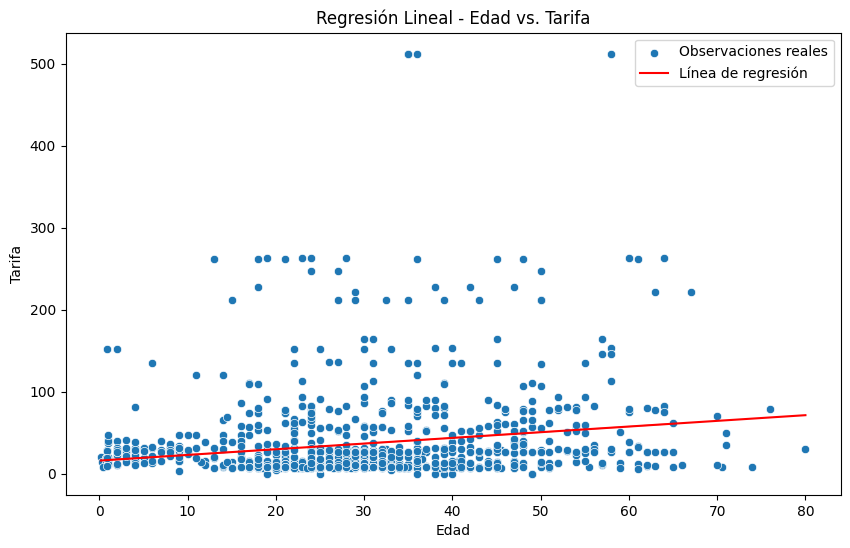

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones con el modelo ajustado
df['Predicted_Fare'] = modelo.predict(X)

# Graficar la relación entre la edad y la tarifa, con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, label='Observaciones reales')
sns.lineplot(x='Age', y='Predicted_Fare', data=df, color='red', label='Línea de regresión')
plt.title('Regresión Lineal - Edad vs. Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend()
plt.show()
